In [68]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1333, 1000, 3)


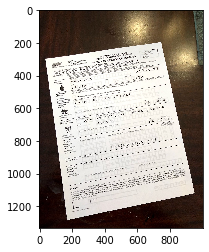

In [69]:
image = cv2.imread("../data/images/scanned-form.jpg")
plt.imshow(image[:,:,::-1]);
print(image.shape)

In [70]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
th , image_thresh = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

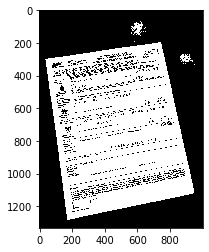

In [71]:
plt.imshow(image_thresh,cmap = 'gray')

In [72]:
contours , hierarchy = cv2.findContours(image_thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [85]:
max_area = 0
for i,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area > max_area:
        cnt_index = i
        max_area = area
        
print(cnt_index)
print(max_area)

120
727015.0


In [74]:
image_copy = image.copy()
image_copy1 = image.copy()
output = cv2.drawContours(image_copy,contours,120, (0,255,0), 10)

In [91]:
epsilon = 0.1*cv2.arcLength(contours[120],True)
approx = cv2.approxPolyDP(contours[120],epsilon,True)

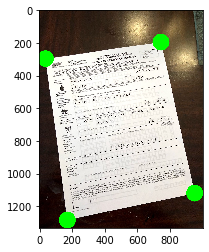

In [92]:
for i in range(approx.shape[0]):
    pt = approx[i].ravel()
    cv2.circle(image_copy1,(pt[0],pt[1]),50,(0,255,0),-1,cv2.LINE_AA)
plt.imshow(image_copy1[:,:,::-1])

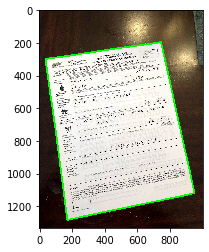

In [93]:
plt.imshow(output[:,:,::-1])

In [94]:
print(approx)

[[[ 743  195]]

 [[  39  297]]

 [[ 173 1284]]

 [[ 948 1119]]]


In [95]:
width = 500
height = 700
dst_points = np.array([[width - 1,0],[0,0],[0,height - 1],[width -1 ,height -1]],dtype = np.float32).reshape(-1,1,2)

In [96]:
h,mask = cv2.findHomography(approx,dst_points)
document_rotated = cv2.warpPerspective(image,h,(500,700))

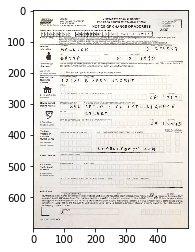

In [97]:
plt.imshow(document_rotated[:,:,::-1])